### Урок 7. Классификация с помощью KNN. Кластеризация K-means

##### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
##### 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [46]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
# X = X[:, :2]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

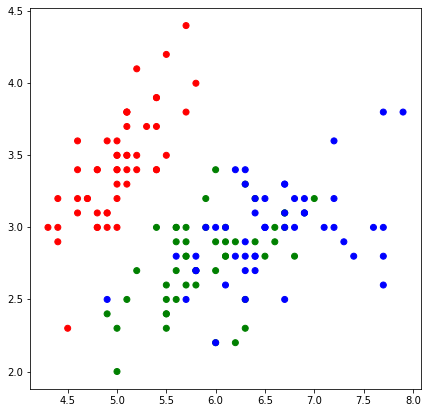

In [48]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [49]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [50]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [51]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [64]:
k = 10

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 10: 0.967
Точность алгоритма на тестовой выборке при k = 10: 0.967


In [65]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Добавление весов для соседей в зависимости от номера соседа.

In [66]:
def weights_n_neighbor(i, d):
    q = 0.6
    return q ** i

In [67]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 10: 0.983
Точность алгоритма на тестовой выборке при k = 10: 0.967


In [68]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

<ipython-input-68-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


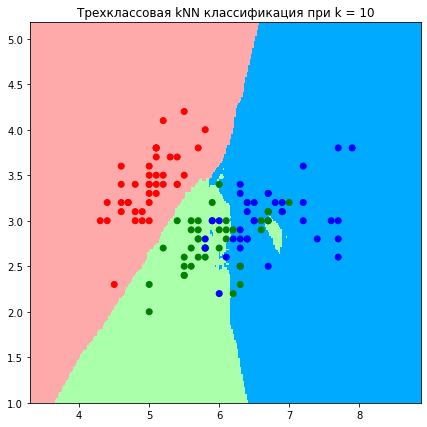

In [69]:
get_graph(X_train, y_train, k)

Добавление весов для соседей в зависимости от расстояния до соседа.

In [70]:
def weights_n_neighbor(i, d):
    q = 0.2
    return q ** d

In [71]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 10: 0.992
Точность алгоритма на тестовой выборке при k = 10: 0.967


<ipython-input-68-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


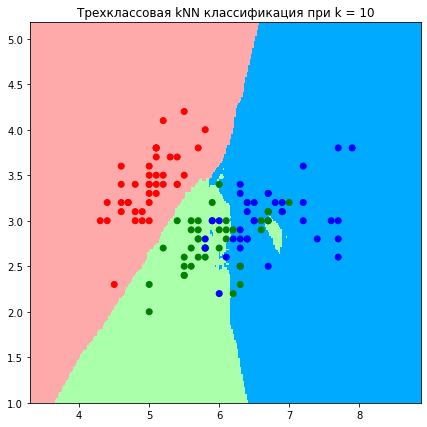

In [72]:
get_graph(X_train, y_train, k)

Добавление весов для соседей в зависимости от расстояния до соседа, вариант 2.

In [73]:
def weights_n_neighbor(i, d):
    return 1 / (d + 0.1)

In [74]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при = 10: 0.992
Точность алгоритма на тестовой выборке при k = 10: 0.967


<ipython-input-68-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


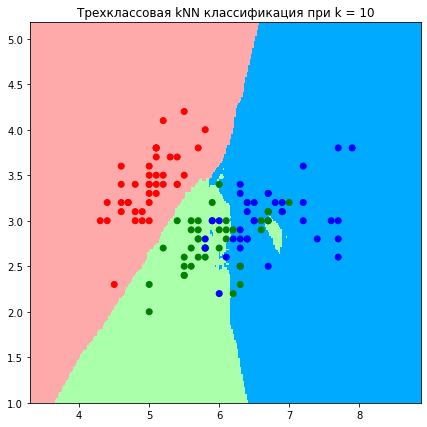

In [75]:
get_graph(X_train, y_train, k)

##### Вывод:
1. При К = 10 точность при добавлении весов в зависимости от номера соседа примерно такая же как и при добавления весов в зависимости от расстояния до соседа как на обучающей так и на тестовой выборках.

1. При малых К результаты практически одинаковые в обоих случаях и гиперплоскости практически не отличаются.

#### 3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [107]:
k = 50

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 50: 0.950
Точность алгоритма на тестовой выборке при k = 50: 0.867


Добавление весов для соседей в зависимости от номера соседа.

In [108]:
def weights_n_neighbor(i, d):
    q = 0.6
    return q ** i

In [109]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 50: 0.983
Точность алгоритма на тестовой выборке при k = 50: 0.967


Добавление весов для соседей в зависимости от расстояния до соседа.

In [110]:
def weights_n_neighbor(i, d):
    q = 0.2
    return q ** d

In [111]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на обучающей выборке при k = 50: 0.967
Точность алгоритма на тестовой выборке при k = 50: 0.933


##### Выводы:
1. Оптимальным числом соседей является 50 (+-10).
2. При К = 50 алгоритм добавления весов в зависимости от расстояния до соседа показал меньшую точность чем в зависимости от номера соседа.
3. При К > 20 разделяющие гиперплоскости строятся неприемлемо медленно.